# 0.2 Exploratory Data Analysis

## Introduction <a id='introduction'></a>
In this notebook, we will be exploring 
- #### How to combine the different years of each dataframe
- #### How to combine the different dataframes
- #### Basic data analysis 
We hope to understand which schools are performing well and develop hypthoses as to why they are performing well. 

## Table of Contents
* [Introduction](#introduction)
* [Data Analysis](#data-analysis)
    * [1 Census](#census)
        * [1.1 Make Census Tall](#census-tall)
        * [1.2 Census Analysis](#census-analysis)
    * [2 Expenditures](#expenditures)
        * [2.1 Make Expenditures Tall](#expenditures-tall)
        * [2.2 Expenditures Analysis](#expenditures-analysis)
        * [2.3 Combine Census And Expenditures](#expenditures-combine)
    * [3 Kaggle](#kaggle)
        * [3.1 Change](#change)
            * [3.1.1 Make Change Tall](#change-tall)
            * [3.1.2 Change Analysis](#change-analysis)
            * [3.1.3 Combine Change, Census, and Expenditures](#change-combine)
        * [3.2 COACT](#coact)
            * [3.2.1 Make COACT Tall](#coact-tall)
            * [3.2.2 COACT Analysis](#coact-analysis)
            * [3.2.3 Combine Change and COACT](#coact-combine)
        * [3.3 Enroll Working](#enroll)
            * [3.3.1 Make Enroll Working Tall](#enroll-tall)
            * [3.3.2 Combine Enroll Working](#enroll-combine)
        * [3.4 Final Grade](#final)
            * [3.4.1 Make Final Grade Tall](#final-tall)
            * [3.4.2 Final Grade Analysis](#final-analysis)
            * [3.4.3 Combine Final Grade](#final-combine)
        * [3.5 Free or Reduced Lunch](#frl)
            * [3.5.1 Make Free or Reduced Lunch Tall](#frl-tall)
            * [3.5.2 Free or Reduced Lunch Analysis](#frl-analysis)
            * [3.5.3 Combine Free or Reduced Lunch](#frl-combine)
        * [3.6 Remediation](#remediation)
            * [3.6.1 Make Remediation Tall](#remediation-tall)
            * [3.6.2 Remediation Analysis](#remediation-analysis)
            * [3.6.3 Combine Remediation](#remediation-combine)
        * [3.7 Address](#address)
            * [3.6.2 Make Address Tall](#address-tall)
            * [3.6.3 Combine Address](#address-combine)
    * [4 Combine Datasets](#combine)
        * [4.1 Combined Analysis](#combine-analysis)
* [Conclusion](#conclusion)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To modules make datasets to perform analysis on
import importlib
import sys
# setting path
sys.path.append('..')
# importing
from src.data import make_datasets
importlib.reload(make_datasets);

## Data Analysis <a name="data-analysis"></a>
In this section, we will perform data analysis on each DataFrame obtained through the make_datasets module by themselves. In the next section, we'll begin to combine them and perform more data analysis.

### 1 Census <a name="census"></a>

#### 1.1 Make Census Tall <a name="census-tall"></a>

In [47]:
make_datasets.make_census('../data/raw/census', '../data/interim')

First, we'll make sure that all the census DataFrames can be combined into a single tall dataframe by checking to see that they all have the same district names set

In [48]:
census_10 = pd.read_csv('../data/interim/census/saipe2010.csv')
census_10

,district_name,est_child_poverty,est_total_child,est_total_pop,year
0,Cheyenne County School District RE-5,39,229,1350,2010
1,Yuma School District 1,179,977,5017,2010
2,Wray School District RD-2,103,727,3958,2010
3,Idalia School District RJ-3,12,92,502,2010
4,Liberty School District J-4,7,69,507,2010
...,...,...,...,...,...
173,Wiggins School District RE-50J,66,533,2526,2010
174,Wiley School District RE-13-JT,39,193,965,2010
175,Windsor School District RE-4,353,4595,21633,2010
176,Woodland Park School District RE-2,351,3124,18629,2010


In [50]:
census_11 = pd.read_csv('../data/interim/census/saipe2011.csv')
census_11

,district_name,est_child_poverty,est_total_child,est_total_pop,year
0,Cheyenne County School District RE-5,47,243,1383,2011
1,Yuma School District 1,203,988,5046,2011
2,Wray School District RD-2,123,736,3980,2011
3,Idalia School District RJ-3,14,93,505,2011
4,Liberty School District J-4,7,70,509,2011
...,...,...,...,...,...
173,Wiggins School District RE-50J,66,531,2528,2011
174,Wiley School District RE-13-JT,36,194,959,2011
175,Windsor School District RE-4,369,4646,22005,2011
176,Woodland Park School District RE-2,382,3081,18551,2011


In [51]:
census_12 = pd.read_csv('../data/interim/census/saipe2012.csv')
census_12

,district_name,est_child_poverty,est_total_child,est_total_pop,year
0,Cheyenne County School District RE-5,27,243,1382,2012
1,Yuma School District 1,197,987,5055,2012
2,Wray School District RD-2,126,734,3988,2012
3,Idalia School District RJ-3,15,93,506,2012
4,Liberty School District J-4,9,70,509,2012
...,...,...,...,...,...
173,Wiggins School District RE-50J,80,518,2556,2012
174,Wiley School District RE-13-JT,33,192,937,2012
175,Windsor School District RE-4,362,4722,22434,2012
176,Woodland Park School District RE-2,416,3042,18577,2012


In [52]:
sum(census_10['district_name'] != census_11['district_name'])

0

In [53]:
sum(census_10['district_name'] != census_12['district_name'])

0

It seems that the natural order that the district name appear in is identical. We can safely make a tall dataframe with each year to perform data analysis well

In [56]:
tall_census = make_datasets.make_tall([census_10, census_11, census_12])
tall_census.to_csv('../data/interim/census/tall_census.csv')

#### 1.2 Census Data Analysis <a name="census-analysis"></a>

In [55]:
tall_census.head()

,district_name,est_child_poverty,est_total_child,est_total_pop,year
0,Cheyenne County School District RE-5,39,229,1350,2010
1,Yuma School District 1,179,977,5017,2010
2,Wray School District RD-2,103,727,3958,2010
3,Idalia School District RJ-3,12,92,502,2010
4,Liberty School District J-4,7,69,507,2010


In [10]:
# Making sure that every column has no null values and they are the right type
tall_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 177
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   district_name      534 non-null    object
 1   est_child_poverty  534 non-null    int64 
 2   est_total_child    534 non-null    int64 
 3   est_total_pop      534 non-null    int64 
 4   year               534 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 25.0+ KB


In [11]:
# Summary statistics on tall_census
tall_census.describe()

,est_child_poverty,est_total_child,est_total_pop,year
count,534.000000,534.000000,534.000000,534.000000
mean,784.011236,4992.402622,28751.777154,2011.000000
std,2300.629097,12999.292561,77715.627682,0.817262
min,5.000000,32.000000,167.000000,2010.000000
25%,39.250000,205.250000,1253.750000,2010.000000
50%,115.000000,630.000000,3964.000000,2011.000000
75%,384.750000,2573.750000,15323.000000,2012.000000
max,26358.000000,90920.000000,634265.000000,2012.000000


In [52]:
# Summary statistics across all school district for each year
census_year_group = tall_census.groupby('year')
census_year_group.describe().T

year                              2010           2011           2012
est_child_poverty count     178.000000     178.000000     178.000000
                  mean      738.685393     778.831461     834.516854
                  std      2194.398468    2199.170762    2506.410683
                  min         5.000000       6.000000       5.000000
                  25%        39.500000      40.500000      39.250000
                  50%       104.500000     107.000000     123.500000
                  75%       367.250000     395.500000     399.250000
                  max     22978.000000   21750.000000   26358.000000
est_total_child   count     178.000000     178.000000     178.000000
                  mean     4967.522472    4988.393258    5021.292135
                  std     12897.437708   13017.594732   13154.887605
                  min        34.000000      32.000000      32.000000
                  25%       216.250000     205.750000     205.250000
                  50%       630.500000     613.000000     604.000000
                  75%      2590.750000    2542.000000    2512.750000
                  max     88970.000000   88725.000000   90920.000000
est_total_pop     count     178.000000     178.000000     178.000000
                  mean    28365.567416   28746.044944   29143.719101
                  std     76512.375323   77845.829782   79202.149312
                  min       172.000000     168.000000     167.000000
                  25%      1257.750000    1253.750000    1281.500000
                  50%      3944.000000    3953.000000    3979.000000
                  75%     15027.250000   15152.000000   15303.000000
                  max    604414.000000  619968.000000  634265.000000
child_pov_ratio   count     178.000000     178.000000     178.000000
                  mean        0.182062       0.190093       0.199442
                  std         0.082707       0.080179       0.090938
                  min         0.033952       0.040228       0.038011
                  25%         0.122072       0.130466       0.129462
                  50%         0.169557       0.181595       0.187976
                  75%         0.230723       0.244321       0.249298
                  max         0.414634       0.392157       0.508108
child_adult_ratio count     178.000000     178.000000     178.000000
                  mean        0.174300       0.171786       0.170051
                  std         0.033589       0.034097       0.033871
                  min         0.100212       0.094262       0.094771
                  25%         0.147535       0.144379       0.142991
                  50%         0.177856       0.175110       0.171984
                  75%         0.200025       0.197296       0.195059
                  max         0.250847       0.241722       0.236527

In [13]:
# Find the percent of children in poverty
# As well as the ratio of children to the overall population
tall_census['child_pov_ratio'] = tall_census['est_child_poverty'] / tall_census['est_total_child']
tall_census['child_adult_ratio'] = tall_census['est_total_child'] / tall_census['est_total_pop']
tall_census.head()

,district_name,est_child_poverty,est_total_child,est_total_pop,year,child_pov_ratio,child_adult_ratio
0,Cheyenne County School District RE-5,39,229,1350,2010,0.170306,0.169630
1,Yuma School District 1,179,977,5017,2010,0.183214,0.194738
2,Wray School District RD-2,103,727,3958,2010,0.141678,0.183679
3,Idalia School District RJ-3,12,92,502,2010,0.130435,0.183267
4,Liberty School District J-4,7,69,507,2010,0.101449,0.136095


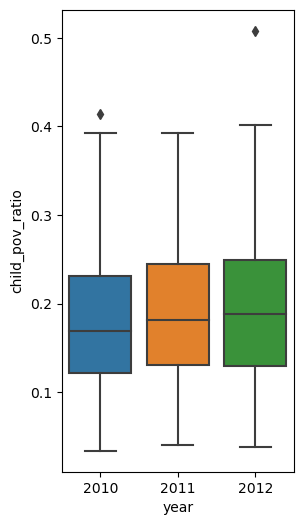

In [60]:
# Show the change in poverty over time
plt.figure(figsize=(3,6), dpi=100)
sns.boxplot(data=tall_census, x='year', y='child_pov_ratio')
plt.show()

<AxesSubplot: xlabel='child_pov_ratio', ylabel='Density'>

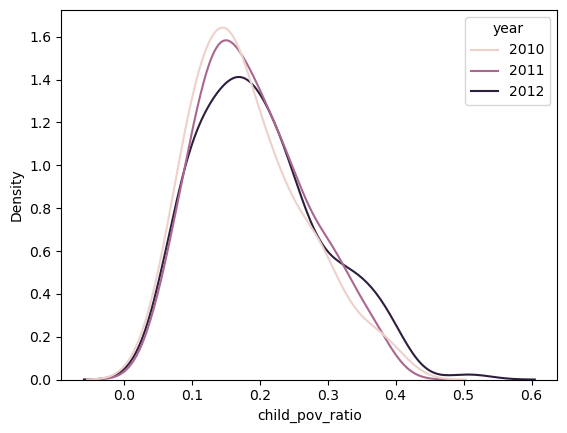

In [15]:
sns.kdeplot(data=tall_census, x='child_pov_ratio', hue='year')

It looks like it might be increasing though not by much. We will perform a hypothesis test to determine if the change across these years is significant

In [16]:
# The highest child poverty ratio's for each school district across every year
tall_census.sort_values('child_pov_ratio', ascending=False).head(10)

,district_name,est_child_poverty,est_total_child,est_total_pop,year,child_pov_ratio,child_adult_ratio
122,Moffat Consolidated School District 2,94,185,1622,2012,0.508108,0.114057
8,Aguilar Reorganized School District 6,68,164,1166,2010,0.414634,0.140652
33,Center School District 26-JT,280,698,3388,2012,0.401146,0.206021
150,Sheridan School District 2,578,1457,8358,2012,0.396706,0.174324
167,Huerfano School District RE-1,257,650,5310,2012,0.395385,0.122411
47,Del Norte School District C-7,262,665,4119,2012,0.393985,0.161447
89,Holly School District RE-3,101,257,1393,2010,0.392996,0.184494
33,Center School District 26-JT,260,663,3353,2011,0.392157,0.197733
142,Mountain Valley School District RE-1,64,165,1410,2012,0.387879,0.117021
144,Centennial School District R-1,112,290,1892,2010,0.386207,0.153277


Similar to the boxplot, in the top 10 highest child poverty ratios, we see 2012 appearing most frequently. Another interesting observation is that the populations of each of the poorest districts are all very small. Let's see if this is true across the average of all years

In [17]:
# The highest average poverty ratio's for each district
tall_census.groupby('district_name').mean().sort_values('child_pov_ratio', ascending=False).drop('year', axis=1).head(10)

,est_child_poverty,est_total_child,est_total_pop,child_pov_ratio,child_adult_ratio
district_name,,,,,
Moffat Consolidated School District 2,75.666667,181.000000,1600.333333,0.417124,0.113115
Center School District 26-JT,259.666667,684.666667,3349.333333,0.379393,0.204437
Centennial School District R-1,108.333333,290.000000,1928.000000,0.373610,0.150415
Aguilar Reorganized School District 6,58.333333,158.333333,1144.000000,0.367704,0.138380
South Conejos School District RE-10,132.666667,363.666667,2249.000000,0.365080,0.161700
Huerfano School District RE-1,246.333333,686.666667,5309.000000,0.360443,0.129297
Mountain Valley School District RE-1,57.333333,161.000000,1390.666667,0.356168,0.115786
Holly School District RE-3,91.666667,258.666667,1387.666667,0.354572,0.186408
Crowley County School District RE-1-J,183.000000,528.000000,5473.000000,0.348587,0.096415


The same idea holds as above. By the looks of it, there doesn't seem to be any correlation between the number of children to adults and poverty. Lets, see the correlation between the child poverty ratio and all other variables

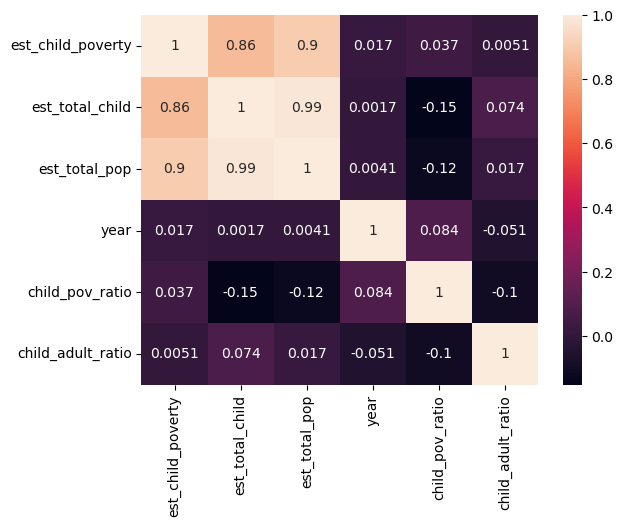

In [18]:
sns.heatmap(tall_census.corr(numeric_only=True), annot=True);

All the correlations seem pretty weak. The strongest of which indicates that in higher populated areas, poverty ratios decrease. Interestingly, there is almost no correlation between the higher populated areas and the ratio of children to adults. This goes against our expectation that more single people live in larger cities 

### 2 Expenditures <a name="expenditures"></a>

#### 2.1 Make Expenditures Tall <a name="expenditures-tall"></a>

In [97]:
# Utilize the make_datasets module
make_datasets.make_expenditures('../data/raw/expenditures', '../data/interim/expenditures')

Similar to the census data, lets make sure that the expenditures can be stacked well. We will find out later if the expenditures and the census data can be combined well

In [131]:
expenditures_2010 = pd.read_csv('../data/interim/expenditures/expenditures2010.csv')
expenditures_2010

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil
0,MAPLETON 1,ADAMS,39962942,23760636,237704,5474579,69435862,5556,3303,33,761,9653
1,ADAMS 12 FIVE STAR,ADAMS,220263102,130356958,943009,83867989,435431057,5482,3244,23,2087,10837
2,ADAMS COUNTY 14,ADAMS,34792431,34598159,703485,7862015,77956091,4956,4928,100,1120,11104
3,BRIGHTON 27J,ADAMS,62557927,50921503,219987,18440305,132139723,4397,3579,15,1296,9287
4,BENNETT 29J,ADAMS,4853879,3540284,0,1004359,9398521,4537,3309,0,939,8784
...,...,...,...,...,...,...,...,...,...,...,...,...
174,YUMA 1,YUMA,4431710,3277849,0,1358007,9067566,5596,4139,0,1715,11450
175,WRAY RD-2,YUMA,3532489,2746335,0,800124,7078947,5378,4181,0,1218,10776
176,IDALIA RJ-3,YUMA,1154510,810850,0,25002,1990362,8539,5997,0,185,14722
177,LIBERTY J-4,YUMA,926415,647462,0,25386,1599262,11068,7736,0,303,19107


In [132]:
expenditures_2011 = pd.read_csv('../data/interim/expenditures/expenditures2011.csv')
expenditures_2011

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil
0,MAPLETON 1,ADAMS,38157232,24772389,1133114,47915629,111978365,5211.0,3383.0,155.0,6544.0,15293.0
1,ADAMS 12 FIVE STAR,ADAMS,222647754,122690063,1234485,204125589,550697892,5417.0,2985.0,30.0,4966.0,13397.0
2,ADAMS COUNTY 14,ADAMS,35356243,37275630,795722,7400225,80827821,5233.0,5517.0,118.0,1095.0,11963.0
3,BRIGHTON 27J,ADAMS,62834937,49692282,261089,61259467,174047775,4239.0,3353.0,18.0,4133.0,11743.0
4,BENNETT 29J,ADAMS,4471446,3839480,0,8277945,16588870,4268.0,3665.0,0.0,7902.0,15835.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,WRAY RD-2,YUMA,3735725,2942154,0,994744,7672623,5572.0,4389.0,0.0,1484.0,11445.0
176,IDALIA RJ-3,YUMA,1115415,829568,0,1113957,3058941,8124.0,6042.0,0.0,8113.0,22279.0
177,LIBERTY J-4,YUMA,1033616,704354,0,0,1737970,12605.0,8590.0,0.0,0.0,21195.0
178,CHARTER SCHOOL INSTITUTE,NaN,35842798,29870470,34733,11932555,77680555,3539.0,2950.0,3.0,1178.0,7671.0


There is one more row in 2011 from 2010. Lets find out what it is

In [133]:
district_names_2011 = set(expenditures_2011['district_name'])
district_names_2010 = set(expenditures_2010['district_name'])
district_names_2011.difference(district_names_2010)

{'GLOBAL VILLAGE CHARTER COLLABORATIVE'}

Let's compare this with the 2012

In [134]:
expenditures_2012 = pd.read_csv('../data/interim/expenditures/expenditures2012.csv')
expenditures_2012

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil
0,MAPLETON 1,ADAMS,38592373,25709054,779878,4153285,69234590,5081.0,3385.0,103.0,547.0,9115.0
1,ADAMS 12 FIVE STAR,ADAMS,221051769,120585070,1335918,51372445,394345203,5347.0,2917.0,32.0,1243.0,9538.0
2,ADAMS COUNTY 14,ADAMS,38196626,36456267,413091,77970868,153036852,5516.0,5265.0,60.0,11260.0,22100.0
3,BRIGHTON 27J,ADAMS,67423272,52627926,247509,24647115,144945822,4392.0,3428.0,16.0,1605.0,9441.0
4,BENNETT 29J,ADAMS,4894710,3252791,0,988729,9136230,4766.0,3167.0,0.0,963.0,8895.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,WRAY RD-2,YUMA,3933428,2857350,0,6011673,12802451,5749.0,4176.0,0.0,8786.0,18712.0
176,IDALIA RJ-3,YUMA,1058571,957184,0,288434,2304189,6786.0,6136.0,0.0,1849.0,14770.0
177,LIBERTY J-4,YUMA,853026,707357,0,0,1560383,10978.0,9104.0,0.0,0.0,20082.0
178,CHARTER SCHOOL INSTITUTE,NaN,40561158,40549832,254978,6088775,87454743,3593.0,3592.0,23.0,539.0,7746.0


In [135]:
district_names_2012 = set(expenditures_2012['district_name'])
district_names_2012 ^ district_names_2010

{'GLOBAL VILLAGE CHARTER COLLABORATIVE'}

The same is true Global Village Charter Collaborative at index 179 is found in 2011 and 2012 but not in 2010. Otherwise, they have the same information. Since this district is missing almost every value in 2011 and 2012, we will drop it and create a tall dataframe with every year

In [136]:
expenditures_2011 = expenditures_2011.drop(179)
expenditures_2012 = expenditures_2012.drop(179)
tall_expenditures = make_datasets.make_tall((expenditures_2010, expenditures_2011, expenditures_2012), (2010, 2011, 2012), 'year')
tall_expenditures.to_csv('../data/interim/expenditures/tall_expenditures.csv')
tall_expenditures.head()

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil,year
0,MAPLETON 1,ADAMS,39962942,23760636,237704,5474579,69435862,5556.0,3303.0,33.0,761.0,9653.0,2010
1,ADAMS 12 FIVE STAR,ADAMS,220263102,130356958,943009,83867989,435431057,5482.0,3244.0,23.0,2087.0,10837.0,2010
2,ADAMS COUNTY 14,ADAMS,34792431,34598159,703485,7862015,77956091,4956.0,4928.0,100.0,1120.0,11104.0,2010
3,BRIGHTON 27J,ADAMS,62557927,50921503,219987,18440305,132139723,4397.0,3579.0,15.0,1296.0,9287.0,2010
4,BENNETT 29J,ADAMS,4853879,3540284,0,1004359,9398521,4537.0,3309.0,0.0,939.0,8784.0,2010


#### 2.2 Expenditures Analysis <a name="expenditures-analysis"></a>

In [137]:
tall_expenditures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 178
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   district_name          537 non-null    object 
 1   county                 534 non-null    object 
 2   instruction_total      537 non-null    int64  
 3   support_total          537 non-null    int64  
 4   community_total        537 non-null    int64  
 5   other_total            537 non-null    int64  
 6   sum_total              537 non-null    int64  
 7   instruction_per_pupil  537 non-null    float64
 8   support_per_pupil      537 non-null    float64
 9   community_per_pupil    537 non-null    float64
 10  other_per_pupil        537 non-null    float64
 11  sum_per_pupil          537 non-null    float64
 12  year                   537 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 58.7+ KB


Looks like there is an issue with the community_per_pupil column because it is not a float data type

In [138]:
# A function that returns True when an entry cannot be converted to a float
@np.vectorize
def is_not_float(entry):
    try:
        float(entry)
        return False
    except:
        return True

In [139]:
tall_expenditures.loc[is_not_float(tall_expenditures['community_per_pupil'])]

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil,year


Luckily, there's only one entry that has an issue. We will impute this value by taking the average of 2011 and 2012

In [125]:
# String variables to make our lives easier
com = 'community_per_pupil'
stras = 'STRASBURG 31J'

# Truth value series to insert later
strasburg_entries = tall_expenditures['district_name'] == 'STRASBURG 31J'
entries_2010 = tall_expenditures['year'] == 2010

# The two values to compute the mean from
com_val_2011 = expenditures_2011[com][expenditures_2011['district_name'] == stras]
com_val_2012 = expenditures_2012[com][expenditures_2012['district_name'] == stras]

# Setting the value
tall_expenditures.loc[(strasburg_entries) & (entries_2010), com] = (com_val_2011 + com_val_2012.values) / 2

In [126]:
# Convert the data type
tall_expenditures['community_per_pupil'] = tall_expenditures['community_per_pupil'].astype('float64')

In [127]:
# Check to make sure it was successful
tall_expenditures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 178
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   district_name          537 non-null    object 
 1   county                 534 non-null    object 
 2   instruction_total      537 non-null    int64  
 3   support_total          537 non-null    int64  
 4   community_total        537 non-null    int64  
 5   other_total            537 non-null    int64  
 6   sum_total              537 non-null    int64  
 7   instruction_per_pupil  537 non-null    float64
 8   support_per_pupil      537 non-null    float64
 9   community_per_pupil    537 non-null    float64
 10  other_per_pupil        537 non-null    float64
 11  sum_per_pupil          537 non-null    float64
 12  year                   537 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 58.7+ KB


In [32]:
per_pupil_data = tall_expenditures.drop(['instruction_total', 'support_total', 'community_total', 'other_total', 'sum_total'], axis=1)
total_data = tall_expenditures.drop(['instruction_per_pupil', 'support_per_pupil', 'community_per_pupil', 'other_per_pupil', 'sum_per_pupil'], axis=1)


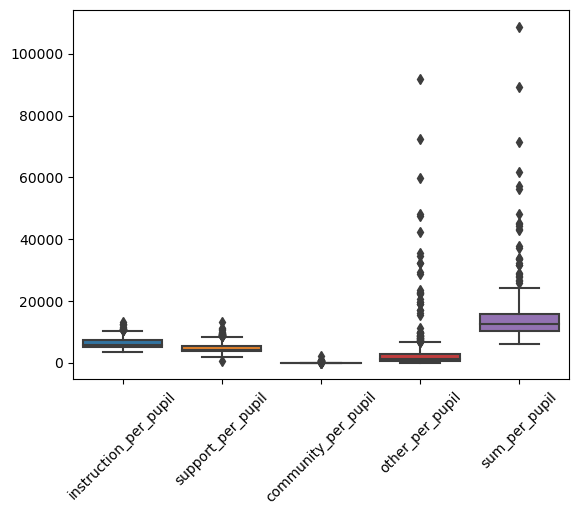

In [34]:
sns.boxplot(per_pupil_data.drop('year', axis=1))
plt.xticks(rotation=45);

Even in the per_pupil spending, there are huge outliers in other spending which is affecting the sum as well. Let's check to make sure that is not a mistake by determining if those outliers are equivalent to the total values

In [35]:
tall_expenditures[tall_expenditures['other_per_pupil'] == tall_expenditures['other_total']]

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil,year
18,PRITCHETT RE-3,BACA,674360,552710,0,0,1227070,10553.0,8650.0,0.0,0.0,19203.0,2010
21,CAMPO RE-6,BACA,514503,642737,16051,0,1173291,10543.0,13171.0,329.0,0.0,24043.0,2010
76,NORTH PARK R-1,JACKSON,1458972,1289280,10979,0,2759231,7421.0,6558.0,56.0,0.0,14035.0,2010
78,EADS RE-1,KIOWA,1278627,908047,0,0,2186674,7306.0,5189.0,0.0,0.0,12495.0,2010
96,BRANSON REORGANIZED 82,LAS ANIMAS,2136497,1270103,9720,0,3416320,4896.0,2910.0,22.0,0.0,7828.0,2010
97,KIM REORGANIZED 88,LAS ANIMAS,604028,541883,0,0,1145911,10597.0,9507.0,0.0,0.0,20104.0,2010
146,MOUNTAIN VALLEY RE 1,SAGUACHE,1193134,857468,0,0,2050602,9984.0,7175.0,0.0,0.0,17160.0,2010
160,LONE STAR 101,WASHINGTON,1030431,517597,0,0,1548028,9666.0,4856.0,0.0,0.0,14522.0,2010
172,PRAIRIE RE-11,WELD,1219619,979228,0,0,2198847,7365.0,5913.0,0.0,0.0,13278.0,2010
18,PRITCHETT RE-3,BACA,694331,609447,0,0,1303777,10332.0,9069.0,0.0,0.0,19401.0,2011


This is only true when the category is 0. Let's sort by other and find out what it looks like

In [36]:
tall_expenditures.sort_values(by='other_per_pupil', ascending=False).head(10)

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil,year
149,SILVERTON 1,SAN JUAN,730805,409292,0,6181429,7321526,10859.0,6082.0,0.0,91849.0,108789.0,2011
149,SILVERTON 1,SAN JUAN,702843,419046,0,4765361,5887250,10665.0,6359.0,0.0,72312.0,89336.0,2010
8,SANGRE DE CRISTO RE-22J,ALAMOSA,1801524,1692183,0,18232716,21726423,5922.0,5563.0,0.0,59937.0,71422.0,2010
128,PARK COUNTY RE-2,PARK,4183166,2808904,5306,25055432,32052809,8040.0,5399.0,10.0,48156.0,61604.0,2011
157,AKRON R-1,WASHINGTON,2187495,1476667,0,17504052,21168214,5915.0,3993.0,0.0,47334.0,57242.0,2011
98,GENOA-HUGO C-113,LINCOLN,1392693,865854,409,6830918,9089874,8640.0,5371.0,3.0,42375.0,56389.0,2012
148,CENTER 26 JT,SAGUACHE,3882536,3307372,125738,20526553,27842199,6693.0,5701.0,217.0,35385.0,47996.0,2011
58,HANOVER 28,EL PASO,1482289,1294630,0,8958674,11735593,5719.0,4995.0,0.0,34563.0,45276.0,2010
34,CENTENNIAL R-1,COSTILLA,1092926,1120145,60807,6884370,9158247,5138.0,5266.0,286.0,32367.0,43057.0,2012
34,CENTENNIAL R-1,COSTILLA,1191954,1312466,0,7494582,9999002,5144.0,5665.0,0.0,32346.0,43155.0,2010


There is definitely a massive imbalance other spending, and it doesn't always seem to be a districts that have the most money to spend

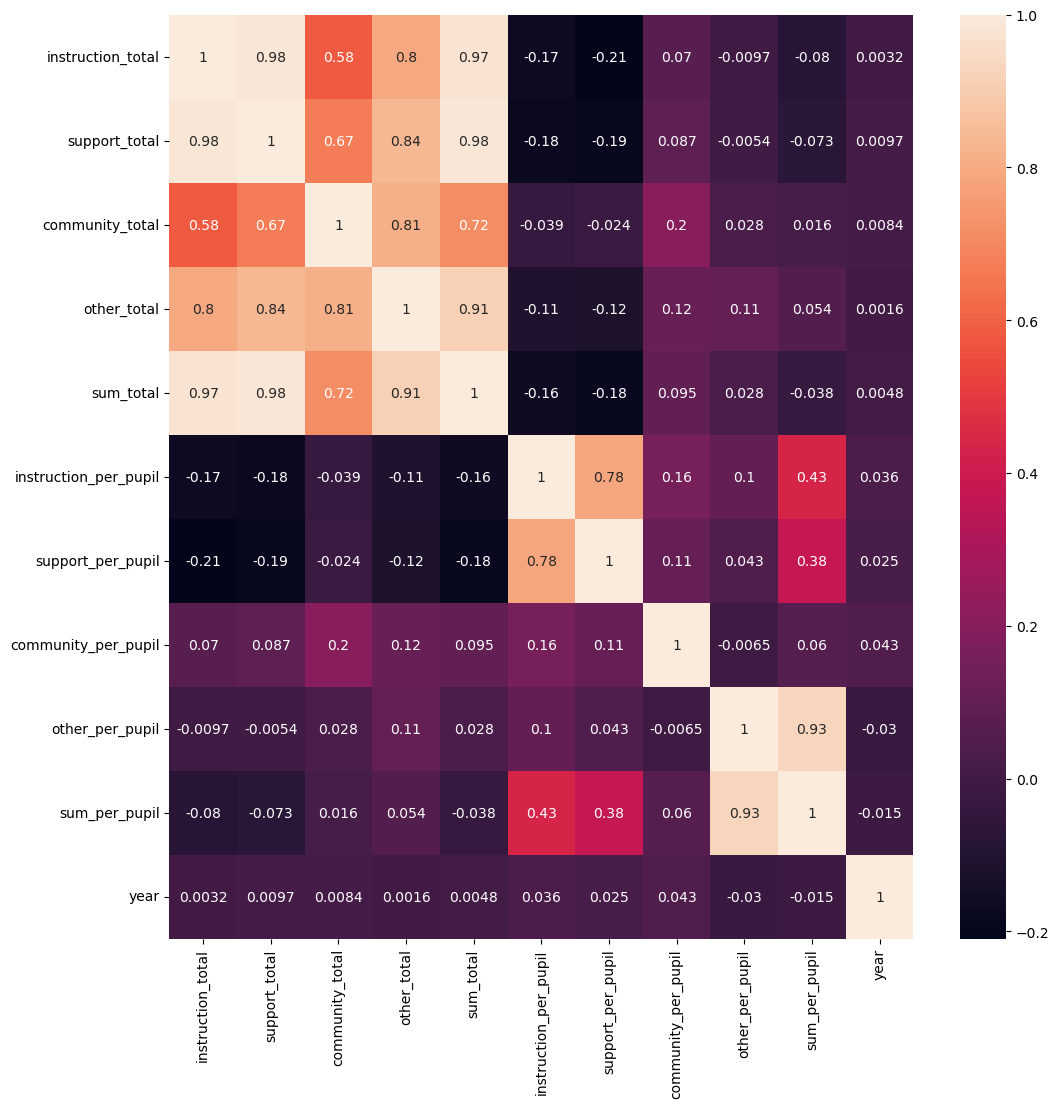

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(tall_expenditures.corr(numeric_only=True), annot=True)
plt.show()

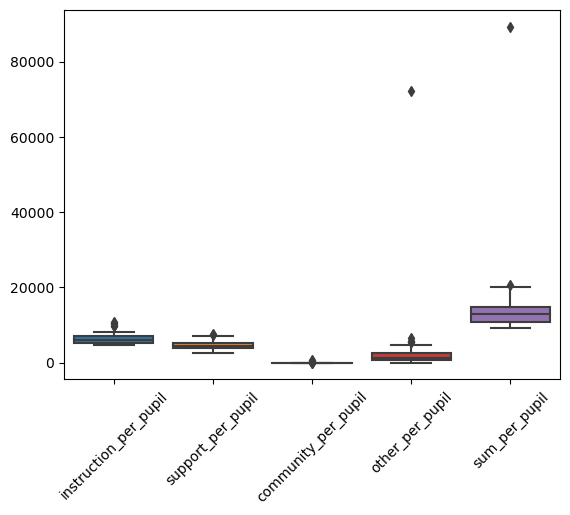

In [63]:
county_per_pupil = per_pupil_data.groupby('county').median(numeric_only=True)
sns.boxplot(county_per_pupil.drop('year', axis=1))
plt.xticks(rotation=45)
plt.show()

It looks like only county accounts for the outliers in spending.

In [120]:
# The county with the maximum spending ability
county_per_pupil['other_per_pupil'].idxmax()

'SAN JUAN'

In [125]:
per_pupil_data[per_pupil_data['county'] == 'SAN JUAN']

,district_name,county,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil,year
149,SILVERTON 1,SAN JUAN,10665.0,6359.0,0.0,72312.0,89336.0,2010
149,SILVERTON 1,SAN JUAN,10859.0,6082.0,0.0,91849.0,108789.0,2011
149,SILVERTON 1,SAN JUAN,13112.0,8775.0,2174.0,1642.0,25702.0,2012


San Juan county has the highest median spending, but Silverton 1 is the only district in the county. We have coincidentally capture a very interesting piece of data. San Juan's spending per pupil has decreased by about 70% in the past two years, and has changed dramatically

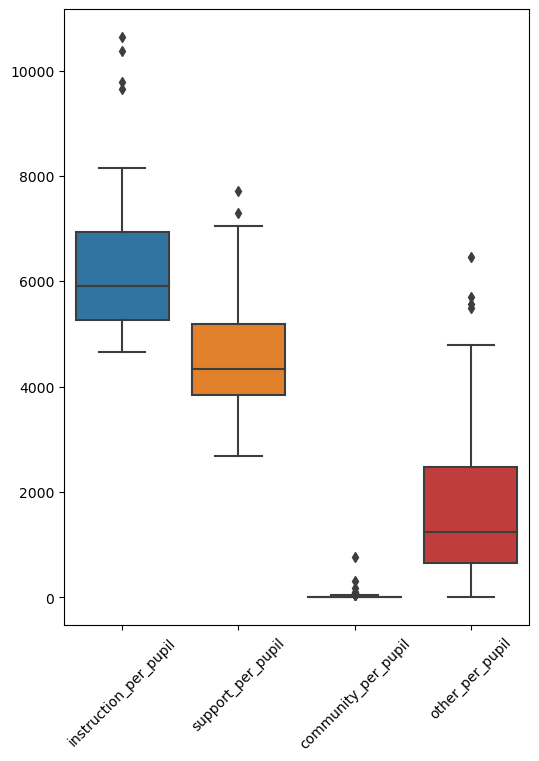

In [64]:
not_san_juan = county_per_pupil.drop('SAN JUAN')
plt.figure(figsize=(6,8))
sns.boxplot(not_san_juan.drop(['sum_per_pupil', 'year'], axis=1))
plt.xticks(rotation=45)
plt.show()

Because we noticed such a huge change in Silverton's spending, lets look at the distribution of the difference in spending

In [45]:
per_pupil_2010 = per_pupil_data.loc[per_pupil_data['year'] == 2010, ['district_name', 'county', 'sum_per_pupil']]
per_pupil_2012 = per_pupil_data.loc[per_pupil_data['year'] == 2012, ['district_name', 'county', 'sum_per_pupil']]
diff_per_pupil = pd.merge(per_pupil_2010, per_pupil_2012, on=('district_name', 'county'), suffixes=('_2010', '_2012'))
diff_per_pupil['difference'] = diff_per_pupil['sum_per_pupil_2012'] - diff_per_pupil['sum_per_pupil_2010']
diff_per_pupil.head()

,district_name,county,sum_per_pupil_2010,sum_per_pupil_2012,difference
0,MAPLETON 1,ADAMS,9653.0,9115.0,-538.0
1,ADAMS 12 FIVE STAR,ADAMS,10837.0,9538.0,-1299.0
2,ADAMS COUNTY 14,ADAMS,11104.0,22100.0,10996.0
3,BRIGHTON 27J,ADAMS,9287.0,9441.0,154.0
4,BENNETT 29J,ADAMS,8784.0,8895.0,111.0


In [46]:
diff_per_pupil.sort_values(by='difference', ascending=False).head(10)

,district_name,county,sum_per_pupil_2010,sum_per_pupil_2012,difference
98,GENOA-HUGO C-113,LINCOLN,14413.0,56389.0,41976.0
81,HI PLAINS R-23,KIT CARSON,15085.0,37764.0,22679.0
70,WEST GRAND 1-JT.,GRAND,12516.0,31576.0,19060.0
42,EAGLE COUNTY RE 50,EAGLE,15425.0,33700.0,18275.0
68,GARFIELD 16,GARFIELD,16077.0,28873.0,12796.0
2,ADAMS COUNTY 14,ADAMS,11104.0,22100.0,10996.0
175,WRAY RD-2,YUMA,10776.0,18712.0,7936.0
6,WESTMINSTER 50,ADAMS,12119.0,19472.0,7353.0
10,SHERIDAN 2,ARAPAHOE,15552.0,21727.0,6175.0
164,KEENESBURG RE-3(J),WELD,10682.0,16068.0,5386.0


In [47]:
diff_per_pupil.sort_values(by='difference', ascending=False).tail(10)

,district_name,county,sum_per_pupil_2010,sum_per_pupil_2012,difference
165,WINDSOR RE-4,WELD,15050.0,9805.0,-5245.0
54,MANITOU SPRINGS 14,EL PASO,15270.0,9780.0,-5490.0
157,AKRON R-1,WASHINGTON,17747.0,12032.0,-5715.0
12,LITTLETON 6,ARAPAHOE,16056.0,10319.0,-5737.0
24,ST VRAIN VALLEY RE 1J,BOULDER,16137.0,10208.0,-5929.0
72,GUNNISON WATERSHED RE1J,GUNNISON,17898.0,11748.0,-6150.0
128,PARK COUNTY RE-2,PARK,28923.0,16118.0,-12805.0
58,HANOVER 28,EL PASO,45276.0,16922.0,-28354.0
8,SANGRE DE CRISTO RE-22J,ALAMOSA,71422.0,12664.0,-58758.0
149,SILVERTON 1,SAN JUAN,89336.0,25702.0,-63634.0


<AxesSubplot: xlabel='difference', ylabel='Count'>

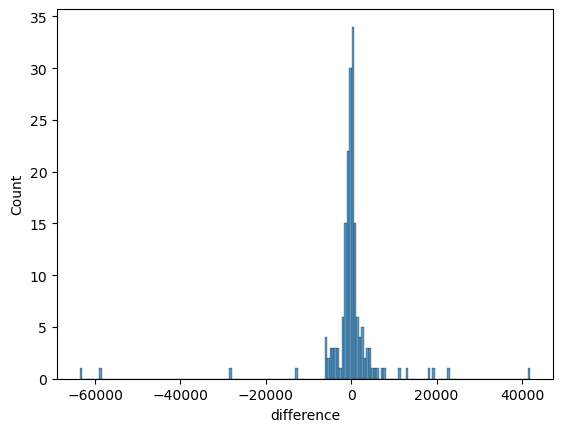

In [48]:
sns.histplot(diff_per_pupil['difference'])

We can clearly see that there is a pretty tight distribution centered around 0 with very extreme outliers

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'instruction_per_pupil'),
  Text(1, 0, 'support_per_pupil'),
  Text(2, 0, 'community_per_pupil'),
  Text(3, 0, 'other_per_pupil'),
  Text(4, 0, 'sum_per_pupil')])

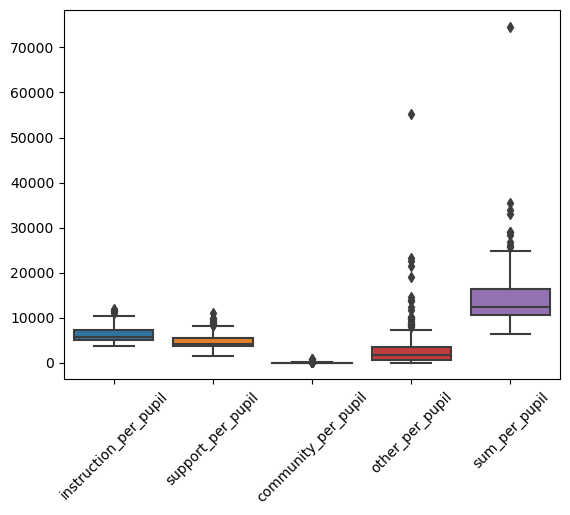

In [49]:
district_per_pupil = per_pupil_data.groupby('district_name').mean(numeric_only=True).drop('year', axis=1)
sns.boxplot(district_per_pupil)
plt.xticks(rotation=45)

In [50]:
district_per_pupil.sort_values('sum_per_pupil')

,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil
district_name,,,,,
JULESBURG RE-1,4876.666667,1391.333333,0.000000,181.666667,6450.000000
BRANSON REORGANIZED 82,4577.333333,2662.000000,28.333333,0.000000,7268.333333
VILAS RE-5,4307.000000,3422.666667,0.000000,43.000000,7773.000000
CHARTER SCHOOL INSTITUTE,3762.666667,3261.666667,11.000000,1212.666667,8247.666667
EATON RE-2,4636.333333,2865.333333,1.000000,856.666667,8359.333333
...,...,...,...,...,...
CHEYENNE COUNTY RE-5,9174.333333,7520.333333,0.666667,12348.666667,29044.000000
SANGRE DE CRISTO RE-22J,6123.666667,5427.666667,0.000000,21457.333333,33009.000000
CENTENNIAL R-1,5047.666667,5547.666667,95.333333,23186.333333,33876.666667


#### 3.3 Combine Expenditures and Census <a name="expenditures-combine"></a>

Now let's move into trying to combine the dataframes. We've noticed from above that the census data contains School District in all of it's district names and the expenditures do not, so we will drop that and see if they can combined easily

In [40]:
# Experiment with making changes to apply
district_names_census = set(census_10['district_name'].str.upper().str.replace('SCHOOL ', '').str.replace('DISTRICT ', '').str.replace('-',' ').str.replace('.',''))

district_names_expenditures = set(expenditures_2011['district_name'].str.replace('-',' ').str.replace('.','').str.replace('S/D ','').str.replace('(','').str.replace('RURAL ','').str.replace(')','').str.replace('','').str.replace(':',' ').str.replace('/',' ').str.replace('NO2','2').str.replace('29J', '29 J').str.replace('49JT','49 JT').str.replace('RE1J','RE 1J'))

district_names_census ^ district_names_expenditures

C:\Users\caeley\AppData\Local\Temp\ipykernel_8464\3049668062.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  district_names_census = set(census_10['district_name'].str.upper().str.replace('SCHOOL ', '').str.replace('DISTRICT ', '').str.replace('-',' ').str.replace('.',''))
C:\Users\caeley\AppData\Local\Temp\ipykernel_8464\3049668062.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  district_names_expenditures = set(expenditures_2011['district_name'].str.replace('-',' ').str.replace('.','').str.replace('S/D ','').str.replace('(','').str.replace('RURAL ','').str.replace(')','').str.replace('','').str.replace(':',' ').str.replace('/',' ').str.replace('NO2','2').str.replace

{'ADAMS 12 FIVE STAR',
 'BAYFIELD 10 JT R',
 'BAYFIELD R 10 JT',
 'CANON CITY RE 1',
 'CAÑON CITY RE 1',
 'CHARTER SCHOOL INSTITUTE',
 'CONSOLIDATED C 1',
 'CUSTER COUNTY C 1',
 'GARFIELD 16',
 'GARFIELD COUNTY 16',
 'JOHNSTOWN MILIKEN RE 5J',
 'JOHNSTOWN MILLIKEN RE 5J',
 'MOFFAT 2',
 'MOFFAT CONSOLIDATED 2',
 'MOFFAT COUNTY RE 1',
 'MOFFAT COUNTY RE NO 1',
 'NORTHGLENN THORNTON 12',
 'PARK ESTES PARK R 3',
 'PARK R 3',
 'WELD COUNTY RE 1',
 'WELD RE 1'}

Looks like there are quite a few differences in district names, most of them probably due to input errors. We'll shelf this for now and look at the Kaggle DataFrames. Since there are more Kaggle DataFrames and we suspect they will be consistent among themselves, we will use that as a tie-breaker.

### 3 Kaggle <a name="kaggle"></a>

#### 3.1 Change <a name="change"></a>

#### 3.1.1 Make Change Tall <a name="change-tall"></a>

In [60]:
change_2010 = pd.read_csv('../data/interim/kaggle/1YR_3YR_change2010.csv')
change_2010.head()

,school,district_id,district_name,school_id,achievement_dir,growth_dir,overall_dir,emh
0,ABRAHAM LINCOLN HIGH SCHOOL,880.0,DENVER COUNTY 1,10.0,1.0,0.0,-1.0,H
1,ACADEMY CHARTER SCHOOL,900.0,DOUGLAS COUNTY RE 1,11.0,1.0,0.0,0.0,E
2,ACADEMY CHARTER SCHOOL,900.0,DOUGLAS COUNTY RE 1,11.0,1.0,1.0,1.0,M
3,ACRES GREEN ELEMENTARY SCHOOL,900.0,DOUGLAS COUNTY RE 1,12.0,0.0,0.0,0.0,E
4,GLACIER PEAK ELEMENTARY SCHOOL,20.0,ADAMS 12 FIVE STAR SCHOOLS,14.0,0.0,1.0,0.0,E


In [61]:
change_2010['emh'].value_counts()

E    1043
M     533
H     446
Name: emh, dtype: int64

In [62]:
change_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2082 non-null   object 
 1   district_id      2082 non-null   float64
 2   district_name    2082 non-null   object 
 3   school_id        2082 non-null   float64
 4   achievement_dir  1821 non-null   float64
 5   growth_dir       1788 non-null   float64
 6   overall_dir      1892 non-null   float64
 7   emh              2022 non-null   object 
dtypes: float64(5), object(3)
memory usage: 130.2+ KB


In [63]:
change_2011 = pd.read_csv('../data/interim/kaggle/1YR_3YR_change2011.csv')
change_2011.head()

,school,district_id,district_name,school_id,achievement_dir,growth_dir,overall_dir,emh
0,ABRAHAM LINCOLN HIGH SCHOOL,880,DENVER COUNTY 1,10,1.0,0.0,0,H
1,ACADEMY CHARTER SCHOOL,900,DOUGLAS COUNTY RE 1,11,0.0,-1.0,0,E
2,ACADEMY CHARTER SCHOOL,900,DOUGLAS COUNTY RE 1,11,0.0,-1.0,0,M
3,ACRES GREEN ELEMENTARY SCHOOL,900,DOUGLAS COUNTY RE 1,12,0.0,0.0,0,E
4,GLACIER PEAK ELEMENTARY SCHOOL,20,ADAMS 12 FIVE STAR SCHOOLS,14,-1.0,0.0,0,E


In [64]:
change_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           1955 non-null   object 
 1   district_id      1955 non-null   int64  
 2   district_name    1955 non-null   object 
 3   school_id        1955 non-null   int64  
 4   achievement_dir  1860 non-null   float64
 5   growth_dir       1773 non-null   float64
 6   overall_dir      1955 non-null   int64  
 7   emh              1955 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 122.3+ KB


It appears that the datasets from each years varies quite a bit

In [67]:
len(set(change_2010['school_id'].astype('int')) ^ set(change_2011['school_id']))

111

In [68]:
len(change_2010) - len(change_2011)

127

There also seems to be repeated school_id values

In [69]:
change_2010['school_id'].value_counts().sort_values(ascending=False)

9999.0    3
2840.0    3
7463.0    3
3350.0    3
263.0     3
         ..
8260.0    1
8266.0    1
8272.0    1
8274.0    1
4792.0    1
Name: school_id, Length: 1785, dtype: int64

In [71]:
change_2010.loc[change_2010['school_id']==9999]

,school,district_id,district_name,school_id,achievement_dir,growth_dir,overall_dir,emh
2079,COLORADO SCHOOL FOR THE DEAF AND BLIND,9000.0,Colorado School for the De,9999.0,-1.0,NaN,0.0,E
2080,COLORADO SCHOOL FOR THE DEAF AND BLIND,9000.0,Colorado School for the De,9999.0,0.0,-1.0,0.0,H
2081,COLORADO SCHOOL FOR THE DEAF AND BLIND,9000.0,Colorado School for the De,9999.0,1.0,1.0,1.0,M


It seems this only occurs when when a combined school has combined seperate e, m, and h scores

In [130]:
change_2010[['school_id', 'emh']].duplicated().sum()

0

Indeed. When taking emh into account there are no duplicates

In [75]:
change_2012 = pd.read_csv('../data/interim/kaggle/1YR_3YR_change2012.csv')
change_2012.head()

,Record_no,district_id,district_name,school_id,school,achievement_dir,growth_dir,overall_dir,emh
0,1.0,1040.0,ACADEMY 20,17.0,ACADEMY ENDEAVOUR ELEMENTARY SCHOOL,0.0,0.0,0.0,E
1,2.0,1040.0,ACADEMY 20,19.0,ACADEMY INTERNATIONAL ELEMENTARY SCHOOL,0.0,0.0,0.0,E
2,3.0,1040.0,ACADEMY 20,110.0,ACADEMY ONLINE HIGH SCHOOL,NaN,NaN,1.0,H
3,4.0,1040.0,ACADEMY 20,76.0,AIR ACADEMY HIGH SCHOOL,0.0,0.0,0.0,H
4,5.0,1040.0,ACADEMY 20,249.0,ANTELOPE TRAILS ELEMENTARY SCHOOL,0.0,0.0,1.0,E


In [66]:
change_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Record_no        2059 non-null   float64
 1   district_id      2059 non-null   float64
 2   district_name    2059 non-null   object 
 3   school_id        2059 non-null   float64
 4   school           2059 non-null   object 
 5   achievement_dir  1902 non-null   float64
 6   growth_dir       1825 non-null   float64
 7   overall_dir      2018 non-null   float64
 8   emh              2059 non-null   object 
dtypes: float64(6), object(3)
memory usage: 145.4+ KB


In [76]:
len(set(change_2010['school_id']) ^ set(change_2012['school_id']))

140

In [77]:
len(change_2010) - len(change_2012)

16

There is a huge discrepancy in the school ids between 2010, 2011, and 2012. In order to obtain the most information from the data we have been given, we will perform analysis on each individual dataset. Then, we will only keep the entries in 2011 and 2012 that have the same school_ids as found in 2010. That way, we will be able to track the progression of the schools that were in 2010. We can also use information from the different number of schools from each year to track how the state has been meeting kids needs by opening and closing schools

#### 3.1.2 Change Analysis <a name="change-analysis"></a>

In [179]:
change = make_datasets.make_tall((change_2010, change_2011, change_2012), (2010, 2011, 2012), 'year').drop('Record_no', axis=1)
change.head()

,school,district_id,district_name,school_id,achievement_dir,growth_dir,overall_dir,emh,year
0,ABRAHAM LINCOLN HIGH SCHOOL,880.0,DENVER COUNTY 1,10.0,1.0,0.0,-1.0,H,2010
1,ACADEMY CHARTER SCHOOL,900.0,DOUGLAS COUNTY RE 1,11.0,1.0,0.0,0.0,E,2010
2,ACADEMY CHARTER SCHOOL,900.0,DOUGLAS COUNTY RE 1,11.0,1.0,1.0,1.0,M,2010
3,ACRES GREEN ELEMENTARY SCHOOL,900.0,DOUGLAS COUNTY RE 1,12.0,0.0,0.0,0.0,E,2010
4,GLACIER PEAK ELEMENTARY SCHOOL,20.0,ADAMS 12 FIVE STAR SCHOOLS,14.0,0.0,1.0,0.0,E,2010


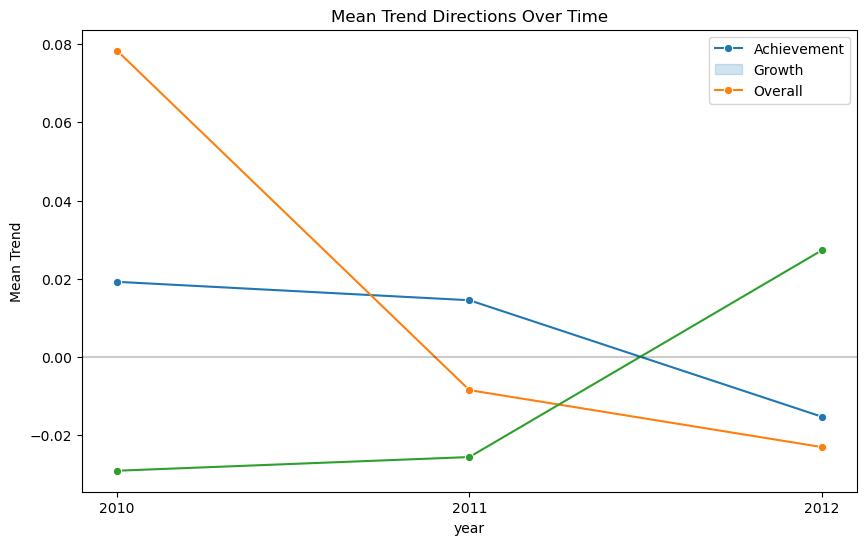

In [159]:
plt.figure(figsize=(10,6), dpi=100)
sns.lineplot(change[['achievement_dir','growth_dir', 'overall_dir', 'year']].groupby('year').mean(), markers=['o']*3, dashes=False)
plt.title('Mean Trend Directions Over Time')
plt.xticks([2010, 2011, 2012])
plt.ylabel('Mean Trend')
plt.legend(['Achievement', 'Growth', 'Overall'])
plt.axhline(0, c='k', alpha=0.2)
plt.show()

Strangely, it seems that while the mean achievement and growth directions decrease, the overall direction increases over time

In [177]:
change[['achievement_dir', 'growth_dir', 'overall_dir']].describe().T

,count,mean,std,min,25%,50%,75%,max
achievement_dir,5583.0,0.005911,0.631606,-1.0,0.0,0.0,0.0,1.0
growth_dir,5386.0,0.015410,0.676399,-1.0,0.0,0.0,0.0,1.0
overall_dir,5865.0,-0.008525,0.653406,-1.0,0.0,0.0,0.0,1.0


At least the mean and standard deviation appear similar for each statistic

<AxesSubplot: >

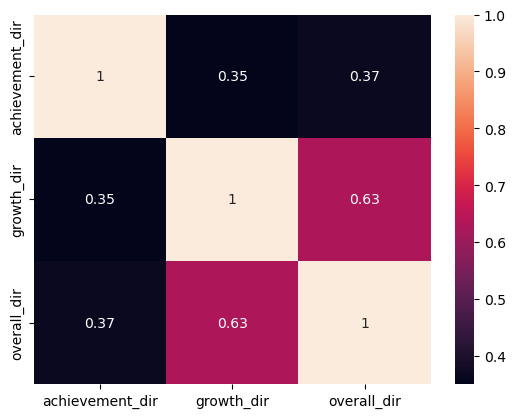

In [206]:
sns.heatmap(change[['achievement_dir', 'growth_dir', 'overall_dir']].corr(), annot=True)

In [203]:
dir_by_dist = change.groupby('district_id').agg({'district_name':'min',
                                                 'achievement_dir': 'mean', 
                                                 'growth_dir': 'mean',
                                                 'overall_dir':'mean', 
                                                 }).fillna(0)
dir_by_dist['computed_dir'] = (dir_by_dist['achievement_dir'] + dir_by_dist['growth_dir'] + dir_by_dist['overall_dir']) / 3

dir_by_dist.sort_values(by='computed_dir', ascending=False)

,district_name,achievement_dir,growth_dir,overall_dir,computed_dir
district_id,,,,,
3070.0,WOODLIN R-104,0.666667,0.500000,0.571429,0.579365
3030.0,AKRON R-1,0.333333,0.555556,0.444444,0.444444
2630.0,HAXTUN RE-2J,0.222222,0.444444,0.444444,0.370370
3220.0,IDALIA RJ-3,0.333333,0.500000,0.250000,0.361111
2810.0,CENTER 26 JT,0.333333,0.444444,0.250000,0.342593
...,...,...,...,...,...
890.0,DOLORES COUNTY RE NO.2,-0.555556,-0.222222,-0.222222,-0.333333
1380.0,HINSDALE COUNTY RE 1,-0.250000,-1.000000,0.000000,-0.416667
1620.0,AGUILAR REORGANIZED 6,0.000000,-1.000000,-0.250000,-0.416667


#### 3.1.3 Combine Change, Census, and Expenditures <a name="change-combine"></a>

In [80]:
tall_census = pd.read_csv('../data/interim/census/tall_census.csv')

In [120]:
district_names_change = set(change_2010['district_name'].str.upper().str.replace('-', ' ').str.replace('(', '', regex=True).str.replace(')', '', regex=True))
district_names_census = set(tall_census['district_name'].str.upper().str.replace('SCHOOL ', '').str.replace('DISTRICT ', '').str.replace('.','',regex=True).str.replace('-', ' ', regex=True))

print(len(district_names_change ^ district_names_census))
district_names_change ^ district_names_census

43


{'ADAMS 12 FIVE STAR SCHOOLS',
 'BAYFIELD 10 JT R',
 'BAYFIELD R 10 JT',
 'BENNETT 29 J',
 'BENNETT 29J',
 'CANON CITY RE 1',
 'CAÑON CITY RE 1',
 'CHARTER SCHOOL INSTITUTE',
 'COLORADO SCHOOL FOR THE DE',
 'CREEDE CONSOLIDATED 1',
 'CREEDE SCHOOL DISTRICT',
 'CUSTER COUNTY C 1',
 'CUSTER COUNTY SCHOOL DISTR',
 'DE BEQUE 49 JT',
 'DE BEQUE 49JT',
 'DOLORES COUNTY RE 2',
 'DOLORES COUNTY RE NO.2',
 'EXPEDITIONARY BOCES',
 'FLORENCE RE 2',
 'FREMONT RE 2',
 'GARFIELD 16',
 'GARFIELD COUNTY 16',
 'GENOA HUGO C 113',
 'GENOA HUGO C113',
 'GUNNISON WATERSHED RE 1J',
 'GUNNISON WATERSHED RE1J',
 'MC CLAVE RE 2',
 'MCCLAVE RE 2',
 'MIAMI YODER 60 JT',
 'MIAMI/YODER 60 JT',
 'MOFFAT 2',
 'MOFFAT CONSOLIDATED 2',
 'MOFFAT COUNTY RE 1',
 'MOFFAT COUNTY RE:NO 1',
 'MOUNTAIN BOCES',
 'NORTHGLENN THORNTON 12',
 'NORTHWEST COLO BOCES',
 'PARK ESTES PARK R 3',
 'PARK R 3',
 'WELD COUNTY RE 8',
 'WELD COUNTY S/D RE 8',
 'WEST GRAND 1 JT',
 'WEST GRAND 1 JT.'}

In [126]:
tall_expenditures = pd.read_csv('../data/interim/expenditures/tall_expenditures.csv')

In [129]:
district_names_change = set(change_2010['district_name'].str.replace('(', '', regex=True).str.replace(')', '', regex=True).str.replace('-', ' '))
district_names_expenditures = set(tall_expenditures['district_name'].str.replace('-', ' '))

print(len(district_names_change ^ district_names_expenditures))
district_names_change ^ district_names_expenditures

22


{'ADAMS 12 FIVE STAR',
 'ADAMS 12 FIVE STAR SCHOOLS',
 'CONSOLIDATED C 1',
 'CREEDE CONSOLIDATED 1',
 'CREEDE SCHOOL DISTRICT',
 'CUSTER COUNTY SCHOOL DISTR',
 'Colorado School for the De',
 'EXPEDITIONARY BOCES',
 'FLORENCE RE 2',
 'FREMONT RE 2',
 'GENOA HUGO C 113',
 'GENOA HUGO C113',
 'JOHNSTOWN MILIKEN RE 5J',
 'JOHNSTOWN MILLIKEN RE 5J',
 'MC CLAVE RE 2',
 'MCCLAVE RE 2',
 'MOUNTAIN BOCES',
 'NORTHWEST COLO BOCES',
 'PUEBLO COUNTY 70',
 'PUEBLO COUNTY RURAL 70',
 'WELD COUNTY RE 1',
 'WELD RE 1'}

It seems that the district names from the kaggle datasets is more reflective of the expenditures datasets than the census datasets. We will keep this in mind later when ironing out the exact details

#### 3.2 COACT <a name="coact"></a>

#### 3.2.1 Make COACT Tall <a name="coact-tall"></a>

In [248]:
coact_2010 = pd.read_csv('../data/interim/kaggle/COACT2010.csv')
coact_2011 = pd.read_csv('../data/interim/kaggle/COACT2011.csv')
coact_2012 = pd.read_csv('../data/interim/kaggle/COACT2012.csv')

In [249]:
coact_2010

,district_id,school,school_id,eng_yn,math_yn,read_yn,sci_yn
0,10.0,MAPLETON EXPEDITIONARY SCHOOL OF THE ARTS,187.0,0,0,0,0
1,10.0,MAPLETON EARLY COLLEGE HIGH SCHOOL,212.0,1,0,0,0
2,10.0,WELBY NEW TECHNOLOGY,221.0,0,0,0,0
3,10.0,GLOBAL LEADERSHIP ACADEMY,263.0,0,0,0,0
4,10.0,SKYVIEW ACADEMY HIGH SCHOOL,309.0,0,0,0,0
...,...,...,...,...,...,...,...
328,8001.0,GOAL ACADEMY,3475.0,0,0,0,0
329,8001.0,THE PINNACLE CHARTER SCHOOL HIGH,6914.0,1,0,0,0
330,8001.0,THE VANGUARD SCHOOL (HIGH),9057.0,1,1,1,1
331,9030.0,YAMPAH MOUNTAIN SCHOOL,6134.0,0,0,0,0


In [250]:
coact_2011

,district_id,school,district_name,school_id,eng_yn,math_yn,read_yn,sci_yn
0,0,STATE LEVEL,STATE LEVEL,0,1.0,0.0,0.0,0.0
1,10,MAPLETON EXPEDITIONARY SCHOOL OF THE ARTS,MAPLETON 1,187,0.0,0.0,0.0,0.0
2,10,MAPLETON EARLY COLLEGE HIGH SCHOOL,MAPLETON 1,212,1.0,0.0,0.0,0.0
3,10,WELBY NEW TECHNOLOGY,MAPLETON 1,221,NaN,NaN,NaN,NaN
4,10,GLOBAL LEADERSHIP ACADEMY,MAPLETON 1,263,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
438,9030,YAMPAH MOUNTAIN SCHOOL,MOUNTAIN BOCES,6134,0.0,0.0,0.0,0.0
439,9030,MOUNTAIN BOCES DAY TREATMENT CENTER,MOUNTAIN BOCES,6136,NaN,NaN,NaN,NaN
440,9030,YAMPAH TEEN PARENT PROGRAM,MOUNTAIN BOCES,9797,NaN,NaN,NaN,NaN
441,9095,YAMPA VALLEY HIGH SCHOOL,NORTHWEST COLO BOCES,9787,NaN,NaN,NaN,NaN


In [251]:
coact_2012

,district_id,school,district_name,school_id,eng_yn,math_yn,read_yn,sci_yn
0,10,ACADEMY HIGH SCHOOL,MAPLETON 1,309,0.0,0.0,0.0,0.0
1,10,COLORADO CONNECTIONS ACADEMY,MAPLETON 1,1796,1.0,0.0,1.0,0.0
2,10,DISTRICT RESULTS,MAPLETON 1,0,0.0,0.0,0.0,0.0
3,10,GLOBAL LEADERSHIP ACADEMY,MAPLETON 1,263,0.0,0.0,0.0,0.0
4,10,MAPLETON EARLY COLLEGE HIGH SCHOOL,MAPLETON 1,212,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
610,9030,YAMPAH TEEN PARENT PROGRAM,MOUNTAIN BOCES,9797,NaN,NaN,NaN,NaN
611,9050,DISTRICT RESULTS,SAN JUAN BOCES,0,NaN,NaN,NaN,NaN
612,9050,SOUTHWEST COLORADO E-SCHOOL,SAN JUAN BOCES,8121,NaN,NaN,NaN,NaN
613,9130,DISTRICT RESULTS,EXPEDITIONARY BOCES,0,1.0,0.0,0.0,0.0


In [238]:
set(coact_2010['school_id']) - set(change_2010['school_id'])

set()

In [241]:
print(set(coact_2011['school_id']) - set(change_2011['school_id']))
print(set(coact_2012['school_id']) - set(change_2012['school_id']))

{0, 1027, 133, 656, 8849, 3350, 8855, 9757, 7199, 930, 7211, 1967, 48, 8890, 9787, 4161, 7748, 9801, 9806, 978, 4179, 221, 1887, 2788, 4965, 4844, 1780, 6261, 3701, 119, 3325}
{0, 6499, 6244, 2217, 5129, 3211, 9801, 9806, 9807, 3387}


It appears that all high school ids in the coact dataset are found in the change dataset for 2010 and not quite for the following years

Furthermore, the number of high schools in this data increases from 333 in 2010 to 615 in 2012

We will approach this problem similarly to the change datasets. For now, we will combine all the information as a tall format with missing data, and we will clip data as necessary to perform more analysis

#### 3.2.2 COACT Analysis <a name="coact-analysis"></a>

In [252]:
coact = make_datasets.make_tall([coact_2010, coact_2011, coact_2012], id_col=(2010,2011,2012), id_name='year').drop('district_name', axis=1)
coact.head()

,district_id,school,school_id,eng_yn,math_yn,read_yn,sci_yn,year
0,10.0,MAPLETON EXPEDITIONARY SCHOOL OF THE ARTS,187.0,0.0,0.0,0.0,0.0,2010
1,10.0,MAPLETON EARLY COLLEGE HIGH SCHOOL,212.0,1.0,0.0,0.0,0.0,2010
2,10.0,WELBY NEW TECHNOLOGY,221.0,0.0,0.0,0.0,0.0,2010
3,10.0,GLOBAL LEADERSHIP ACADEMY,263.0,0.0,0.0,0.0,0.0,2010
4,10.0,SKYVIEW ACADEMY HIGH SCHOOL,309.0,0.0,0.0,0.0,0.0,2010


In [253]:
coact.groupby('year')[['eng_yn','math_yn','read_yn','sci_yn']].describe().T

year                 2010        2011        2012
eng_yn  count  333.000000  333.000000  487.000000
        mean     0.624625    0.537538    0.552361
        std      0.484948    0.499339    0.497762
        min      0.000000    0.000000    0.000000
        25%      0.000000    0.000000    0.000000
        50%      1.000000    1.000000    1.000000
        75%      1.000000    1.000000    1.000000
        max      1.000000    1.000000    1.000000
math_yn count  333.000000  333.000000  487.000000
        mean     0.087087    0.117117    0.098563
        std      0.282387    0.322044    0.298380
        min      0.000000    0.000000    0.000000
        25%      0.000000    0.000000    0.000000
        50%      0.000000    0.000000    0.000000
        75%      0.000000    0.000000    0.000000
        max      1.000000    1.000000    1.000000
read_yn count  333.000000  333.000000  487.000000
        mean     0.183183    0.243243    0.207392
        std      0.387399    0.429686    0.405856
        min      0.000000    0.000000    0.000000
        25%      0.000000    0.000000    0.000000
        50%      0.000000    0.000000    0.000000
        75%      0.000000    0.000000    0.000000
        max      1.000000    1.000000    1.000000
sci_yn  count  333.000000  333.000000  487.000000
        mean     0.036036    0.024024    0.014374
        std      0.186660    0.153354    0.119148
        min      0.000000    0.000000    0.000000
        25%      0.000000    0.000000    0.000000
        50%      0.000000    0.000000    0.000000
        75%      0.000000    0.000000    0.000000
        max      1.000000    1.000000    1.000000

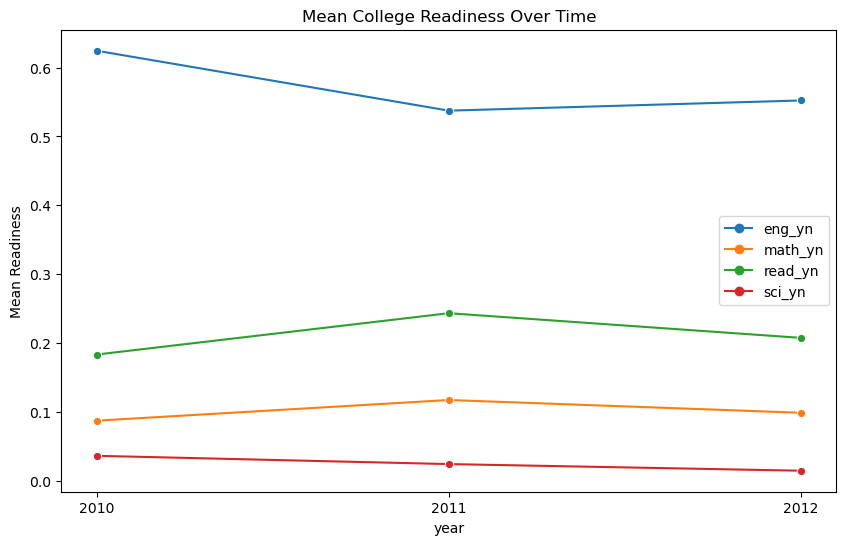

In [260]:
plt.figure(figsize=(10,6), dpi=100)
sns.lineplot(coact.groupby('year')[['eng_yn','math_yn','read_yn','sci_yn']].mean(), markers=['o']*4, dashes=False)
plt.title('Mean College Readiness Over Time')
plt.xticks([2010, 2011, 2012])
plt.ylabel('Mean Readiness')
plt.show()

It seems that Coloradan students have been consistently most prepared in english and reading and least prepared in math and science. In fact, English is the only subject where mean readiness is greater than 50%!

<AxesSubplot: >

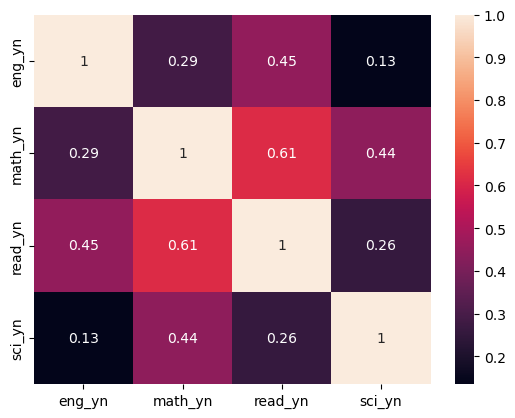

In [261]:
sns.heatmap(coact[['eng_yn','math_yn','read_yn','sci_yn']].corr(), annot=True)

There seems to be a bit of a relationship between reading and math scores. The correlation between the two is higher than any other.

In [269]:
coact_by_dist = coact.groupby('district_id')[['eng_yn','math_yn','read_yn','sci_yn']].mean(numeric_only=True)
coact_by_dist['computed_yn'] = coact_by_dist.mean(axis=1)
coact_by_dist.dropna().sort_values(by='computed_yn', ascending=False).head(10)

,eng_yn,math_yn,read_yn,sci_yn,computed_yn
district_id,,,,,
1020.0,1.000000,1.000000,1.000,0.000000,0.750000
1120.0,1.000000,1.000000,1.000,0.000000,0.750000
2640.0,1.000000,1.000000,1.000,0.000000,0.750000
1080.0,1.000000,0.857143,1.000,0.000000,0.714286
2590.0,1.000000,0.750000,0.750,0.250000,0.687500
560.0,1.000000,0.500000,1.000,0.000000,0.625000
3050.0,1.000000,0.500000,1.000,0.000000,0.625000
140.0,1.000000,0.600000,0.800,0.000000,0.600000
1040.0,0.958333,0.333333,0.750,0.083333,0.531250


In [270]:
coact_by_dist.describe().T

,count,mean,std,min,25%,50%,75%,max
eng_yn,153.0,0.559616,0.393330,0.0,0.230769,0.666667,1.00000,1.00
math_yn,153.0,0.069244,0.195607,0.0,0.000000,0.000000,0.00000,1.00
read_yn,153.0,0.167864,0.297889,0.0,0.000000,0.000000,0.25000,1.00
sci_yn,153.0,0.008937,0.039636,0.0,0.000000,0.000000,0.00000,0.25
computed_yn,153.0,0.201415,0.184946,0.0,0.062500,0.187500,0.28125,0.75


#### 3.2.3 Combine COACT <a name="coact-combine"></a>

We will eventually combine the COACT dataset with other high school information to make a high school dataset. For now, it can remain

#### 3.3 Enroll Working <a name="enroll"></a>

#### 3.3.1 Make Enroll Working Tall <a name="enroll-tall"></a>

In [273]:
enroll_2010 = pd.read_csv('../data/interim/kaggle/enrl_working2010.csv')
enroll_2010

,district_id,district_name,school_id,school,total,pct_amind,pct_asian,pct_black,pct_hisp,pct_white,pct_pi,pct_2ormore
0,10.0,MAPLETON 1,187.0,MAPLETON EXPEDITIONARY SCHOOL OF THE ARTS,543.0,0.012891,0.005525,0.033149,0.572744,0.344383,0.001842,0.029466
1,10.0,MAPLETON 1,212.0,FRONT RANGE EARLY COLLEGE,174.0,0.034483,0.005747,0.028736,0.568966,0.350575,0.000000,0.011494
2,10.0,MAPLETON 1,263.0,GLOBAL LEADERSHIP ACADEMY,447.0,0.002237,0.000000,0.026846,0.850112,0.109620,0.000000,0.011186
3,10.0,MAPLETON 1,309.0,SKYVIEW ACADEMY HIGH SCHOOL,311.0,0.003215,0.032154,0.012862,0.710611,0.234727,0.000000,0.006431
4,10.0,MAPLETON 1,501.0,MONTEREY COMMUNITY SCHOOL,385.0,0.012987,0.010390,0.005195,0.797403,0.161039,0.000000,0.012987
...,...,...,...,...,...,...,...,...,...,...,...,...
1793,8001.0,CHARTER SCHOOL INSTITUTE,9057.0,THE VANGUARD SCHOOL (HIGH),135.0,0.000000,0.059259,0.029630,0.140741,0.703704,0.014815,0.051852
1794,9030.0,MOUNTAIN BOCES,6134.0,YAMPAH MOUNTAIN SCHOOL,90.0,0.011111,0.000000,0.000000,0.366667,0.622222,0.000000,0.000000
1795,9030.0,MOUNTAIN BOCES,6136.0,MOUNTAIN BOCES DAY TREATMENT CENTER,26.0,0.000000,0.000000,0.000000,0.230769,0.769231,0.000000,0.000000
1796,9030.0,MOUNTAIN BOCES,9797.0,YAMPAH TEEN PARENT PROGRAM,26.0,0.000000,0.000000,0.000000,0.923077,0.076923,0.000000,0.000000


In [274]:
enroll_2011 = pd.read_csv('../data/interim/kaggle/enrl_working2011.csv')
enroll_2011

,district_id,district_name,school_id,school,total,pct_amind,pct_asian,pct_black,pct_hisp,pct_white,pct_pi,pct_2ormore
0,10.0,MAPLETON 1,187.0,MAPLETON EXPEDITIONARY SCHOOL OF THE ARTS,543.0,0.012891,0.005525,0.033149,0.572744,0.344383,0.001842,0.029466
1,10.0,MAPLETON 1,212.0,FRONT RANGE EARLY COLLEGE,174.0,0.034483,0.005747,0.028736,0.568966,0.350575,0.000000,0.011494
2,10.0,MAPLETON 1,263.0,GLOBAL LEADERSHIP ACADEMY,447.0,0.002237,0.000000,0.026846,0.850112,0.109620,0.000000,0.011186
3,10.0,MAPLETON 1,309.0,SKYVIEW ACADEMY HIGH SCHOOL,311.0,0.003215,0.032154,0.012862,0.710611,0.234727,0.000000,0.006431
4,10.0,MAPLETON 1,501.0,MONTEREY COMMUNITY SCHOOL,385.0,0.012987,0.010390,0.005195,0.797403,0.161039,0.000000,0.012987
...,...,...,...,...,...,...,...,...,...,...,...,...
1793,8001.0,CHARTER SCHOOL INSTITUTE,9057.0,THE VANGUARD SCHOOL (HIGH),135.0,0.000000,0.059259,0.029630,0.140741,0.703704,0.014815,0.051852
1794,9030.0,MOUNTAIN BOCES,6134.0,YAMPAH MOUNTAIN SCHOOL,90.0,0.011111,0.000000,0.000000,0.366667,0.622222,0.000000,0.000000
1795,9030.0,MOUNTAIN BOCES,6136.0,MOUNTAIN BOCES DAY TREATMENT CENTER,26.0,0.000000,0.000000,0.000000,0.230769,0.769231,0.000000,0.000000
1796,9030.0,MOUNTAIN BOCES,9797.0,YAMPAH TEEN PARENT PROGRAM,26.0,0.000000,0.000000,0.000000,0.923077,0.076923,0.000000,0.000000


In [275]:
enroll_2012 = pd.read_csv('../data/interim/kaggle/enrl_working2012.csv')
enroll_2012

,district_id,district_name,school_id,school,total,pct_amind,pct_asian,pct_black,pct_hisp,pct_white,pct_pi,pct_2ormore,unnamed: 12,unnamed: 13,unnamed: 14
0,10,MAPLETON 1,187,MAPLETON EXPEDITIONARY SCHOOL OF THE ARTS,556,0.017986,0.003597,0.025180,0.611511,0.312950,0.0,0.028777,NaN,NaN,NaN
1,10,MAPLETON 1,212,MAPLETON EARLY COLLEGE HIGH SCHOOL,189,0.015873,0.005291,0.015873,0.634921,0.306878,0.0,0.021164,NaN,NaN,NaN
2,10,MAPLETON 1,263,GLOBAL LEADERSHIP ACADEMY,448,0.004464,0.000000,0.011161,0.904018,0.075893,0.0,0.004464,NaN,NaN,NaN
3,10,MAPLETON 1,309,ACADEMY HIGH SCHOOL,300,0.000000,0.016667,0.016667,0.740000,0.216667,0.0,0.010000,NaN,NaN,NaN
4,10,MAPLETON 1,501,MONTEREY COMMUNITY SCHOOL,416,0.004808,0.012019,0.004808,0.826923,0.141827,0.0,0.009615,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,9030,MOUNTAIN BOCES,6136,PROJECT REBOUND,14,0.000000,0.000000,0.071429,0.214286,0.714286,0.0,0.000000,NaN,NaN,NaN
1809,9030,MOUNTAIN BOCES,9797,YAMPAH TEEN PARENT PROGRAM,27,0.000000,0.000000,0.000000,0.925926,0.074074,0.0,0.000000,NaN,NaN,NaN
1810,9035,CENTENNIAL BOCES,1607,CENTENNIAL BOCES HIGH SCHOOL,90,0.011111,0.000000,0.011111,0.555556,0.422222,0.0,0.000000,NaN,NaN,NaN
1811,9050,SAN JUAN BOCS,8121,SOUTHWEST COLORADO E-SCHOOL,51,0.156863,0.000000,0.000000,0.176471,0.647059,0.0,0.019608,NaN,NaN,NaN


In [279]:
(enroll_2010 != enroll_2011).sum()

district_id      0
district_name    0
school_id        0
school           1
total            0
pct_amind        0
pct_asian        0
pct_black        0
pct_hisp         0
pct_white        0
pct_pi           0
pct_2ormore      0
dtype: int64

It seems that the enroll_2010 and enroll_2011 datasets are identical. There are no good ways of addressing this. Probably, the only thing that can be done is to assume that demographics of the schools have not changed that much over three years since we have imputing that many values meaningfully.

#### 3.3.2 Combine Enroll Working <a name="enroll-combine"></a>

In [287]:
set(enroll_2012['school_id']) ^ set(change_2012['school_id'])

{0,
 6,
 34,
 70,
 124,
 447,
 489,
 515,
 763,
 776,
 1020,
 1270,
 1555,
 1596,
 1607,
 1799,
 2205,
 2217,
 2349,
 2373,
 2448,
 2481,
 2788,
 2942,
 2951,
 3038,
 3099,
 3211,
 3250,
 3279,
 3585,
 3603,
 3649,
 3729,
 4084,
 4385,
 4495,
 4843,
 4910,
 5129,
 5221,
 5318,
 5393,
 5414,
 5430,
 5539,
 5579,
 5751,
 5777,
 5840,
 5880,
 5998,
 6055,
 6244,
 6292,
 6315,
 6399,
 6499,
 6504,
 6546,
 6830,
 7096,
 7285,
 7300,
 7430,
 8453,
 8458,
 8500,
 8804,
 8832,
 8886,
 8945,
 9234,
 9245,
 9264,
 9268,
 9656,
 9999.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 7643,
 7725,
 7843,
 7856,
 7924,
 8119,
 8131,
 8143,
 8149}